In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:

file = "new_sets.csv"
df= pd.read_csv(file, index_col=0)
# df1['Logged OS'] = np.random.choice(['Android', 'IOS','BlackBerry','Symbian', 'Others'], df1.shape[0])
# df1.to_csv('new_sets.csv')


In [ ]:
Total_Sessions=df['Logged OS'].count()
prod_prof = df
prod_prof["TotalAmount"] = prod_prof["Quantity"]*prod_prof["UnitPrice"]
prod_prof["Totalprofit"] = prod_prof["Quantity"]*prod_prof["Profit"]
TotalProfit=prod_prof['Totalprofit'].sum()
TotalSales=prod_prof['TotalAmount'].sum()

TotalProfit
TotalSales

In [ ]:
loggedDevice=df['Logged OS']
loggedDevice=loggedDevice.groupby(loggedDevice.values).size()
loggedDevice=loggedDevice.reset_index(drop=False)
loggedDevice.columns = ["Logged OS","Count"]
os=loggedDevice['Logged OS'].tolist()
count=loggedDevice['Count'].tolist()


In [ ]:
#top Profitable products
df


I clean the datasets here

In [ ]:
desc = df["Description"].value_counts()
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"]).dt.date
df


# Product should be kept

##### We can see here in the bar Chart the items need to be kept and order more quantity and we can answer the question what product most profitable and product to be kept

In [ ]:
plt.figure(figsize=(12,8))
sns.barplot(desc.head(40).index, desc.head(40).values)
plt.xticks(rotation="vertical")
plt.title("Most Item sold from 2010-2011", fontsize=20)
plt.xlabel("Item Description", fontsize=15)
plt.ylabel("Item Quantity")
plt.show()

# Items sold within a Year

In [ ]:
inv_data = df["InvoiceDate"].value_counts().sort_index()
inv_data.head()

#### Here at the new chart, we can see the summary items most purchased by  months.

In [ ]:
plt.figure(figsize=(12,8))
inv_data.plot(color="red")
plt.xticks(rotation="vertical", fontsize=15)
plt.title("Summary for item Sold in a Year", fontsize=20)
plt.xlabel("Months", fontsize=15)
plt.ylabel("Item Release Quantity", fontsize=15)
plt.show()

# Customer who buy more often

#### Here we can see at the chart below the customer who purchased more using by their Customer ID

In [3]:
custID = df["CustomerID"].value_counts().reset_index()
custID.columns = ["CustID","Items they buyed"]
custID["CustID"] = custID["CustID"].apply(str)
custIDx = custID.sort_values("Items they buyed", ascending=False).head(60)
custIDx=custIDx.head(20)
custIDx['CustID'].tolist()
custIDx['Items they buyed'].tolist()



[7983,
 5903,
 5128,
 4642,
 2782,
 2491,
 2085,
 1857,
 1677,
 1640,
 1508,
 1420,
 1284,
 1212,
 1165,
 1160,
 1152,
 1128,
 1094,
 1076]

#   

/home/asanka/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


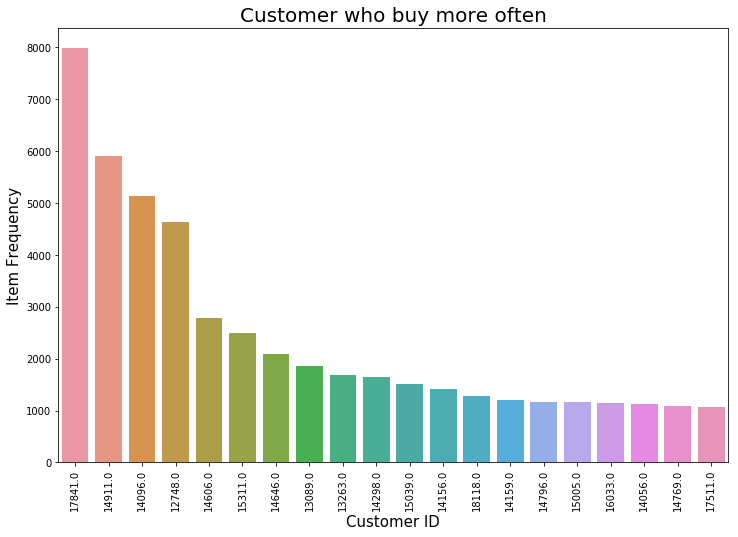

In [5]:
plt.figure(figsize=(12,8))
g = sns.barplot(custIDx.index, custIDx["Items they buyed"])
g.set_xticklabels(custIDx["CustID"], rotation="vertical")
plt.title("Customer who buy more often", fontsize=20)
plt.xlabel("Customer ID", fontsize=15)
plt.ylabel("Item Frequency", fontsize=15)
plt.show()

#  

##### I Add the Total Amount for the item they purchased "Quantity" x "Unit Price" = "Total Amount", so I can graph the total amount they purchased per Customer

In [ ]:
        prod_prof = df
        prod_prof["TotalAmount"] = prod_prof["Quantity"]*prod_prof["UnitPrice"]
        prod_prof["Totalprofit"] = prod_prof["Quantity"]*prod_prof["Profit"]
        prod_prof=prod_prof.set_index("Description")
        prod_prof = prod_prof['Totalprofit']
        prod_prof
        Revenue=prod_prof['Totalprofit'].sum()
            
        prod_prof=prod_prof.groupby(prod_prof.index).agg('sum')
        prod_prof.index.names = ['Description']
        prod_prof=prod_prof.reset_index(drop=False)
        
        prod_prof = prod_prof.sort_values("Totalprofit", ascending=False).head(60)
        prod_prof=prod_prof.head(20)
        Description=prod_prof['Description'].tolist()
        Totalprofit=prod_prof['Totalprofit'].tolist()
       

        

In [ ]:

prod_prof.index = prod_prof.index.to_datetime()
prod_prof=prod_prof.groupby(prod_prof.index.month).agg('sum')

prod_prof

In [ ]:
prod_prof = df
prod_prof["TotalAmount"] = prod_prof["Quantity"]*prod_prof["UnitPrice"]
prod_prof["Totalprofit"] = prod_prof["Quantity"]*prod_prof["Profit"]

prod_prof["Totalprofit"].sum() # Anually Sale

prod_prof=prod_prof.set_index("InvoiceDate")

prod_prof.head()
total_amount = prod_prof.groupby("InvoiceDate")["TotalAmount","Quantity","UnitPrice"].agg({"TotalAmount":["sum","count"],
                                                                   "Quantity":["sum","count"],
                                                                   "UnitPrice":["sum","count"]})
total_amount.head()
tA = total_amount["TotalAmount"]["sum"]
tA

prod_prof.index = prod_prof.index.to_datetime()
prod_prof['tA']=tA
prod_prof=prod_prof["tA"]
prod_prof=prod_prof.groupby(prod_prof.index.month).agg('sum')

prod_prof

#   

### As we can see below, the graph tells that the high sale are on the last quarter on the year

In [ ]:
plt.figure(figsize=(12,8))
prod_prof.plot()
plt.xticks(rotation="vertical")
plt.title("Sale Every Month", fontsize=20)
plt.xlabel("Year", fontsize=15)
plt.ylabel("Total Sale", fontsize=15)
plt.show()

#    

# Model for Predicting sale

In [6]:
prod_prof = df
prod_prof["TotalAmount"] = prod_prof["Quantity"]*prod_prof["UnitPrice"]
prod_prof["Totalprofit"] = prod_prof["Quantity"]*prod_prof["Profit"]

prod_prof["Totalprofit"].sum() # Anually Sale

prod_prof=prod_prof.set_index("InvoiceDate")

prod_prof.head()
total_amount = prod_prof.groupby("InvoiceDate")["TotalAmount","Quantity","UnitPrice"].agg({"TotalAmount":["sum","count"],
                                                                   "Quantity":["sum","count"],
                                                                   "UnitPrice":["sum","count"]})
total_amount.head()
tA = total_amount["TotalAmount"]["sum"]
tA

prod_prof.index = prod_prof.index.to_datetime()
prod_prof['tA']=tA
prod_prof=prod_prof["tA"]
prod_prof=prod_prof.groupby(prod_prof.index.month).agg('sum')

prod_prof
prod_prof.head()

/home/asanka/.local/lib/python3.6/site-packages/ipykernel_launcher.py:17: FutureWarning: to_datetime is deprecated. Use pd.to_datetime(...)


1   NaN
2   NaN
3   NaN
4   NaN
5   NaN
Name: tA, dtype: float64

#   

#### i clean the datasets here for our models

/home/asanka/.local/lib/python3.6/site-packages/ipykernel_launcher.py:20: FutureWarning: to_datetime is deprecated. Use pd.to_datetime(...)


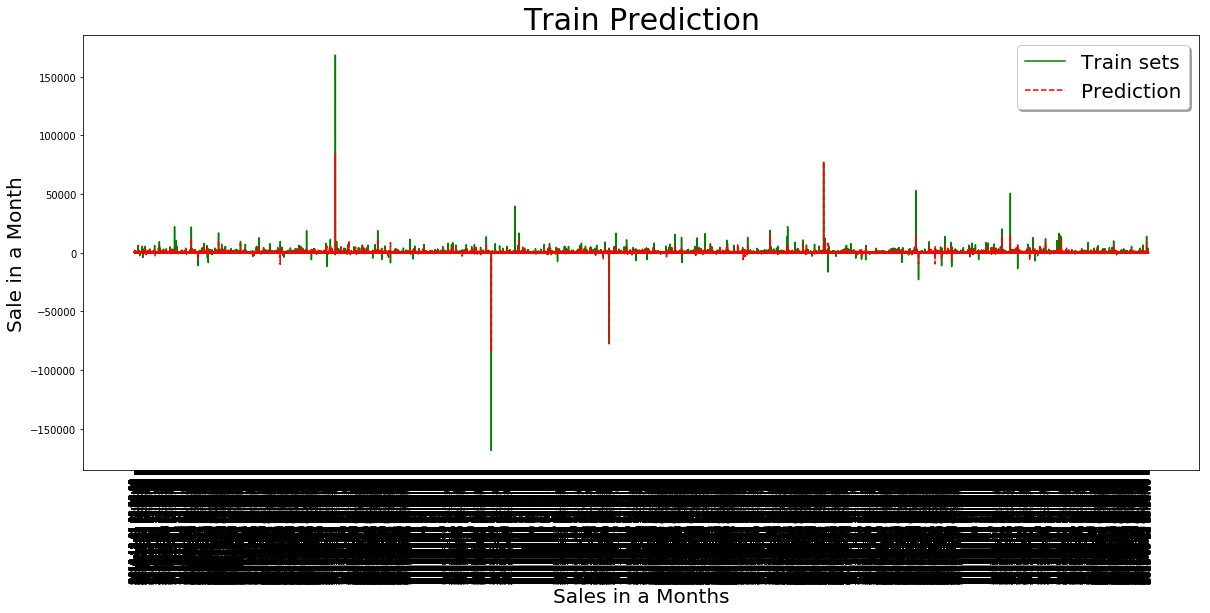

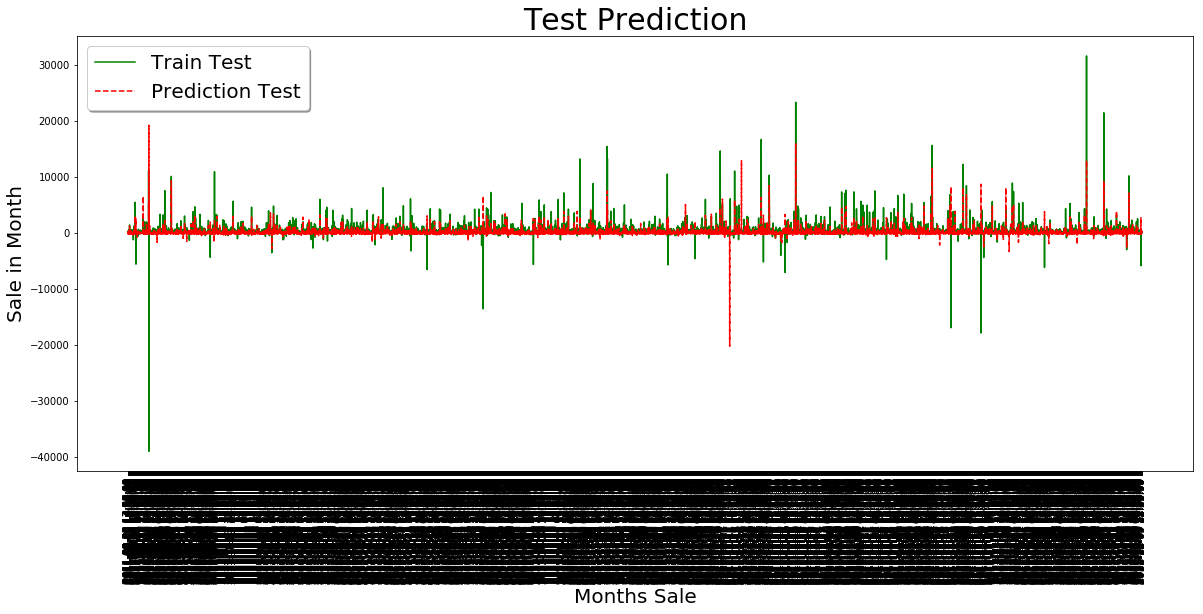

Loaded model ::  SVR(C=1e-05, cache_size=200, coef0=0.0, degree=1, epsilon=0.1, gamma='auto',
  kernel='poly', max_iter=1000, shrinking=True, tol=0.001, verbose=False)
Test score: 12.91 %


array([ -90.73336711,  -83.40194592,  -73.82563785, ..., -129.20087984,
        -64.18543418,  310.68569982])

In [38]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
prod_prof = df
prod_prof["TotalAmount"] = prod_prof["Quantity"]*prod_prof["UnitPrice"]
prod_prof["Totalprofit"] = prod_prof["Quantity"]*prod_prof["Profit"]

prod_prof["Totalprofit"].sum() # Anually Sale

prod_prof=prod_prof.set_index("InvoiceDate")

prod_prof.head()
total_amount = prod_prof.groupby("InvoiceDate")["TotalAmount","Quantity","UnitPrice"].agg({"TotalAmount":["sum","count"],
                                                                   "Quantity":["sum","count"],
                                                                   "UnitPrice":["sum","count"]})
total_amount.head()
tA = total_amount["TotalAmount"]["sum"]
tA

prod_prof.index = prod_prof.index.to_datetime()
prod_prof['tA']=tA
prod_prof=prod_prof["tA"]
prod_prof=prod_prof.groupby(prod_prof.index.month).agg('sum')

prod_prof
prod_prof.head()

y = total_amount["TotalAmount"]["sum"].values
X = total_amount[["Quantity","UnitPrice"]].values

train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.30, random_state=415)  # i split the datasets here by 30%

'''This is plotting section'''
fig, ax = plt.subplots(figsize=(20,8))
a = total_amount.index[0:div] # this is the date ex: '2010-10-1, 2010-10-2, 2010-10-3'
ax.plot(a, train_y, "k", label="Train sets", color="green") # i put on the plot for our expected output, this is the color green
ax.plot(a, yhat, "k--", label="Prediction", color="red") # here is the plot for prediction, this is color red in our plot
ax.legend(loc="upper right", shadow=True, fontsize=20)
plt.xticks(rotation="vertical")
plt.title("Train Prediction", fontsize=30)
plt.xlabel("Sales in a Months", fontsize=20)
plt.ylabel("Sale in a Month", fontsize=20)
plt.show()

test_yhat = svr_lin.predict(test_x)

fig, ax = plt.subplots(figsize=(20,8))
a = total_amount.index[div:div_len]
ax.plot(a, test_y, "k", color="green", label="Train Test")
ax.plot(a, test_yhat, "k--", color="red", label="Prediction Test")
ax.legend(loc="upper left", shadow=True, fontsize=20)
plt.title("Test Prediction", fontsize=30)
plt.xticks(rotation="vertical")
plt.xlabel("Months Sale", fontsize=20)
plt.ylabel("Sale in Month", fontsize=20)
plt.show()




model=svr_lin

# Dump the trained decision tree classifier with Pickle
filename1 = 'pickle_model1.pkl'
# Open the file to save as pkl file
save_model_pkl = open(filename1, 'wb')
pickle.dump(model, save_model_pkl)
# Close the pickle instances
save_model_pkl.close()


# Loading the saved model pickle
pklfile = open(filename1, 'rb')
load_model = pickle.load(pklfile)
print ("Loaded model :: ", load_model)

# Calculate the accuracy score and predict target values
score = load_model.score(test_x, test_y)  
print("Test score: {0:.2f} %".format(100 * score))  
Ypredict = load_model.predict(train_x) 
Ypredict

In [9]:
y = total_amount["TotalAmount"]["sum"].values
X = total_amount[["Quantity","UnitPrice"]].values

array([[  40.  ,    7.  ,   27.37,    7.  ],
       [  12.  ,    2.  ,    3.7 ,    2.  ],
       [  98.  ,   16.  ,   77.34,   16.  ],
       ..., 
       [ 278.  ,   21.  ,   37.78,   21.  ],
       [  66.  ,    4.  ,   20.23,    4.  ],
       [ 105.  ,   15.  ,   44.5 ,   15.  ]])

### I Split the datasets by 30%

In [11]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.30, random_state=415)  # i split the datasets here by 30%

In [12]:
'''I am using the SVR Polynomial from the sklearn model, with iteration by 1000 '''
svr_lin = SVR(kernel="poly", C=1e-5, degree=1, max_iter=1000)
svr_lin.fit(train_x, train_y) # i feed the training sets here to our model
yhat = svr_lin.predict(train_x) # and this is the output or a prediction for our training sets
div = len(train_y) # dont mind this
div_len = len(total_amount) # dont mind this

/home/asanka/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


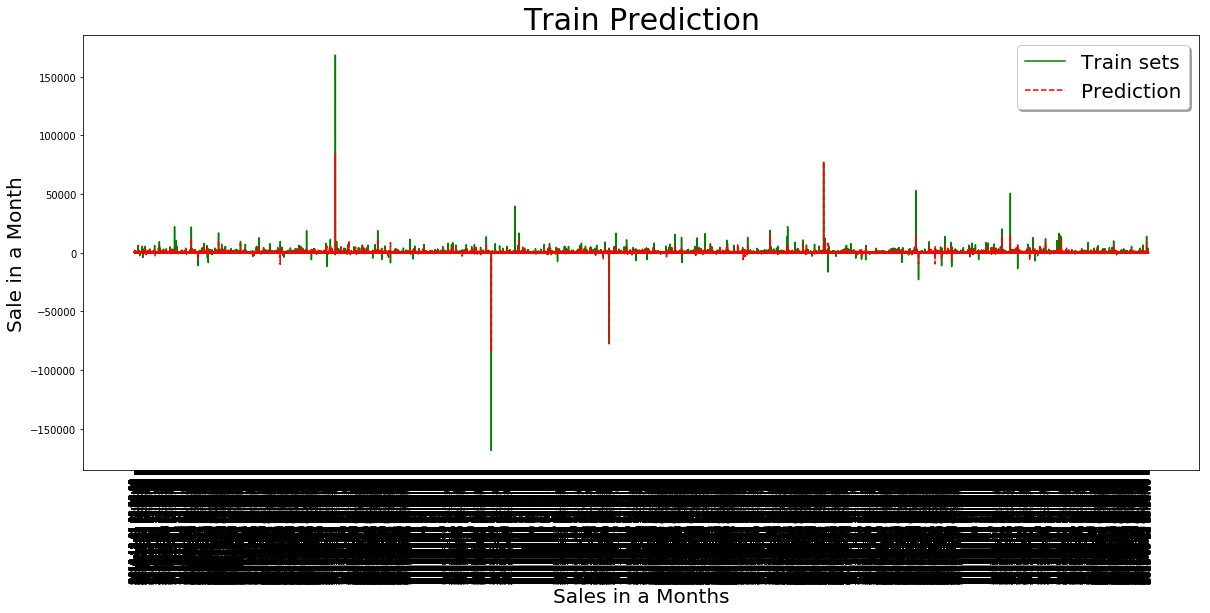

In [13]:
'''This is plotting section'''
fig, ax = plt.subplots(figsize=(20,8))
a = total_amount.index[0:div] # this is the date ex: '2010-10-1, 2010-10-2, 2010-10-3'
ax.plot(a, train_y, "k", label="Train sets", color="green") # i put on the plot for our expected output, this is the color green
ax.plot(a, yhat, "k--", label="Prediction", color="red") # here is the plot for prediction, this is color red in our plot
ax.legend(loc="upper right", shadow=True, fontsize=20)
plt.xticks(rotation="vertical")
plt.title("Train Prediction", fontsize=30)
plt.xlabel("Sales in a Months", fontsize=20)
plt.ylabel("Sale in a Month", fontsize=20)
plt.show()

#### We can see here the postive outcome of our model, the sets are not overfit, so lets check the prediction below for test 

In [15]:
test_yhat = svr_lin.predict(test_x)

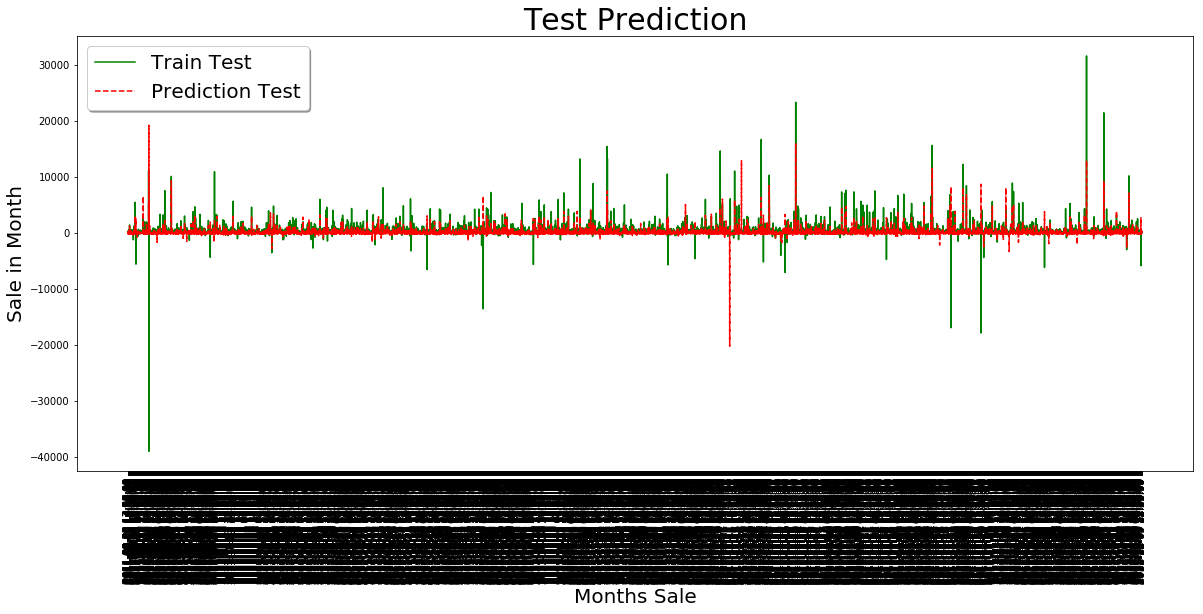

In [37]:
fig, ax = plt.subplots(figsize=(20,8))
a = total_amount.index[div:div_len]
ax.plot(a, test_y, "k", color="green", label="Train Test")
ax.plot(a, test_yhat, "k--", color="red", label="Prediction Test")
ax.legend(loc="upper left", shadow=True, fontsize=20)
plt.title("Test Prediction", fontsize=30)
plt.xticks(rotation="vertical")
plt.xlabel("Months Sale", fontsize=20)
plt.ylabel("Sale in Month", fontsize=20)
plt.show()

In [30]:
import pickle

#
# Create your model here (same as above)
#

# Save to file in the current working directory
pkl_filename = "pickle_model.pkl"  
with open(pkl_filename, 'wb') as file:  
    pickle.dump(svr_lin, file)

# Load from file
with open(pkl_filename, 'rb') as file:  
    pickle_model = pickle.load(file)

# Calculate the accuracy score and predict target values
score = pickle_model.score(test_x, test_y)  
print("Test score: {0:.2f} %".format(100 * score))  
Ypredict = pickle_model.predict(train_x) 
Ypredict

Test score: 12.91 %


array([ 341.21141544,   73.89577165, -112.94181366, ...,   48.61015866,
        145.3658466 ,  -60.61547405])

In [35]:
# Dump the trained decision tree classifier with Pickle
filename1 = 'pickle_model1.pkl'
# Open the file to save as pkl file
save_model_pkl = open(filename1, 'wb')
pickle.dump(svr_lin, save_model_pkl)
# Close the pickle instances
save_model_pkl.close()


# Loading the saved model pickle
pklfile = open(filename1, 'rb')
load_model = pickle.load(pklfile)
print ("Loaded model :: ", load_model)

# Calculate the accuracy score and predict target values
score = load_model.score(test_x, test_y)  
print("Test score: {0:.2f} %".format(100 * score))  
Ypredict = load_model.predict(train_x) 
Ypredict

Loaded model ::  SVR(C=1e-05, cache_size=200, coef0=0.0, degree=1, epsilon=0.1, gamma='auto',
  kernel='poly', max_iter=1000, shrinking=True, tol=0.001, verbose=False)
Test score: 12.91 %


array([ -90.73336711,  -83.40194592,  -73.82563785, ..., -129.20087984,
        -64.18543418,  310.68569982])

In [36]:


model=svr_lin

# Dump the trained decision tree classifier with Pickle
filename1 = 'pickle_model1.pkl'
# Open the file to save as pkl file
save_model_pkl = open(filename1, 'wb')
pickle.dump(model, save_model_pkl)
# Close the pickle instances
save_model_pkl.close()


# Loading the saved model pickle
pklfile = open(filename1, 'rb')
load_model = pickle.load(pklfile)
print ("Loaded model :: ", load_model)

# Calculate the accuracy score and predict target values
score = load_model.score(test_x, test_y)  
print("Test score: {0:.2f} %".format(100 * score))  
Ypredict = load_model.predict(train_x) 
Ypredict

Loaded model ::  SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


ValueError: Classification metrics can't handle a mix of continuous and multiclass targets

#### as we can see in the test sets, our graph for prediction is good, and we have a positive outcome, so we predict the sales by every month and also a year

#    

#    

# Correlation item with other items

In [ ]:
prod_prof.head()

In [ ]:
corr = pd.read_csv("datasets//correlation.zip", index_col=0, compression="zip")
corr.head()

as we can see above, customer ID brough some items

In [ ]:
cor_ = corr.corr()

In [ ]:
corr.columns

In [ ]:
def corr_items(item):
    list_item = cor_[item].sort_values(ascending=False).head(10)
    plt.figure(figsize=(12,8))
    sns.barplot(list_item.index, list_item.values)
    plt.title("Correlated Items", fontsize=30)
    plt.xlabel("Items", fontsize=20)
    plt.ylabel("Percentage of correlate", fontsize=20)
    plt.xticks(rotation="vertical")
    plt.show()
    return

item = "FIRE POLISHED GLASS NECKL GOLD"
corr_items(item)

As per the graph above, if we it can give the correlation items

Profit


In [ ]:
prod_prof = df
prod_prof["TotalAmount"] = prod_prof["Quantity"]*prod_prof["UnitPrice"]
prod_prof["Totalprofit"] = prod_prof["Quantity"]*prod_prof["Profit"]

prod_prof= prod_prof.drop(['UnitPrice','Quantity','CustomerID',], 1)

prod_prof.head()